En aquest fitxer, utilitzem diferents classificadors per TOTA la data:

In [5]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
odor = pd.read_json('Data/odor_prop.json', lines=False, orient='records')

In [7]:
odor.head(3)

,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,MolMR,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
0,alliaceous,third,139711,5,CCSC(C)SCC,0.00,2.8386,150.312,150.053692,45.726,...,Thioacetals,Dithioacetals,,Dithioacetals,Sulfenyl compounds Dialkylthioethers Hydrocar...,Aliphatic acyclic compounds,Thioacetal Dialkylthioether Sulfenyl compound...,This compound belongs to the class of organic...,Chemical entities Dialkylthioethers Dithioace...,
1,alliaceous,second,8030,5,C1=CSC=C1,0.00,1.7481,84.143,84.003371,24.319,...,None,None,None,None,None,None,None,None,None,None
2,alliaceous,second,521869,5,CCC(=O)SC,17.07,1.2860,104.174,104.029586,28.813,...,Thiocarboxylic acids and derivatives,Thioesters,,Thioesters,Carbothioic S-esters Sulfenyl compounds Carbo...,Aliphatic acyclic compounds,Carbothioic s-ester Thiocarboxylic acid ester...,This compound belongs to the class of organic...,with the general structure RC(=S)XR' (R=H,alkyl


In [8]:
ind_X=odor.columns[5:58]

In [9]:
X = odor[ind_X]
y = odor['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/home/lmc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


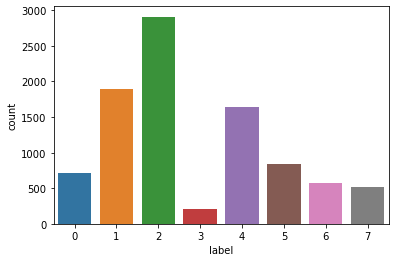

In [10]:
sns.countplot(y_train)

/home/lmc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


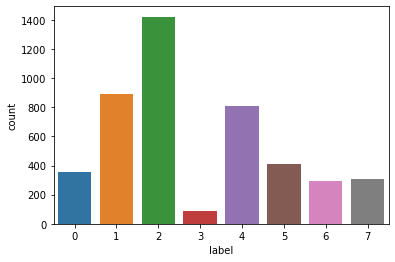

In [11]:
sns.countplot(y_test)

In [18]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LinearDiscriminantAnalysis(),
    make_pipeline(StandardScaler(), SVC(gamma='auto')),
    svm.SVC()
    ]

# Logging for Visual Comparison


for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results*b***')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
      
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 24.9235%
DecisionTreeClassifier
****Results****
Accuracy: 22.3242%
RandomForestClassifier
****Results****
Accuracy: 25.0109%
LinearDiscriminantAnalysis
****Results****
Accuracy: 34.7313%
Pipeline
****Results****
Accuracy: 35.3429%
SVC
****Results****
Accuracy: 31.0398%
